# ABC Rejection

This example shows you how to perform ABC rejection on a time series from the stochastic degradation model.

In [1]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.StochasticDegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 100)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior(
    [0.0],
    [0.3]
)

# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

Fit using ABC rejection.

In [2]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(1)

# set target number of samples
abc.set_n_target(200)

# log to screen
abc.set_log_to_screen(True)

# Run!
print('Running...')
samples = abc.run()
print('Done!')

Running...
Using Rejection ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     9      0.111111111      0:00.0
2     104    0.0192307692     0:00.1
3     246    0.012195122      0:00.2
20    2175   0.0091954023     0:01.0
40    5796   0.00690131125    0:02.6
60    7759   0.00773295528    0:03.4
80    10607  0.00754218912    0:04.6
100   12821  0.00779970361    0:05.6
120   16420  0.00730816078    0:07.2
140   20313  0.00689213804    0:08.9
160   23078  0.00693300979    0:10.1
180   26204  0.00686918028    0:11.5
200   27554  0.00725847427    0:12.2
Halting: target number of samples (200) reached.
Done!


Plot approximate posterior vs actual parameter value.

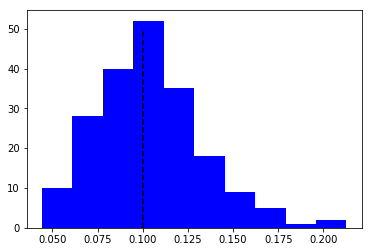

In [3]:
plt.hist(samples[:,0], color="blue")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=50)
plt.show()